In [29]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load labor capacity data
ds_mean = xr.open_dataset('../data/processed/GFDL/labor_mean_ens1-3.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [6]:
ds_90 = xr.apply_ufunc(lf.emergence,ds_mean['capacity'],input_core_dims=[['time']],vectorize=True,kwargs={'thres':90,'start_year':1950})

In [48]:
ens_num = len(ds_90['ensemble'].values)
ds_gray = (ds_90>2100).sum(dim='ensemble').stack(xy=('lon','lat'))
ds_cusp = (ds_gray < ens_num) & (ds_gray > 0)

In [49]:
#ds_cusp = ds_cusp.stack(xy=('lon','lat'))
ds_cusp = ds_cusp.where(ds_cusp,drop=True)

In [50]:
X = [x[0] for x in ds_cusp['xy'].values]
Y = [x[1] for x in ds_cusp['xy'].values]

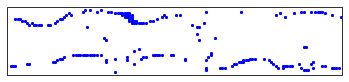

In [57]:
crs = ccrs.PlateCarree()
fig,ax=plt.subplots(subplot_kw={'projection':crs})
ax.scatter(X,Y,transform=crs,zorder=1,color='blue',marker='x',s=5)